In [3]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



#load the APS Settlement data
Setldt = pd.read_csv("settlements_data.csv")


In [4]:
# data-points,features, and columns
print(Setldt.shape)

print(Setldt.columns)


(30683, 8)
Index(['id', 'user_id', 'cycle_id', 'settlement_amount', 'settlement_status',
       'days_delayed', 'bill_created_at', 'settled_at'],
      dtype='object')


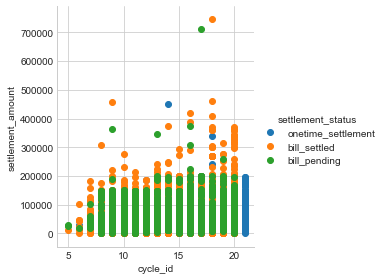

In [5]:
# 2-D Scatter plot with color-coding for each type of settlement.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(Setldt, hue="settlement_status", size=4) \
   .map(plt.scatter, "cycle_id", "settlement_amount") \
   .add_legend();
plt.show()

# observation(s):
    1) we can see that bills are settled when the amount is  big or it is less, there are very few settlements
       done for the normal amount
    2) onetime settlement is seen to be done in the later cycles( I think users are getting used to the APS
        and trusting APS)

C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


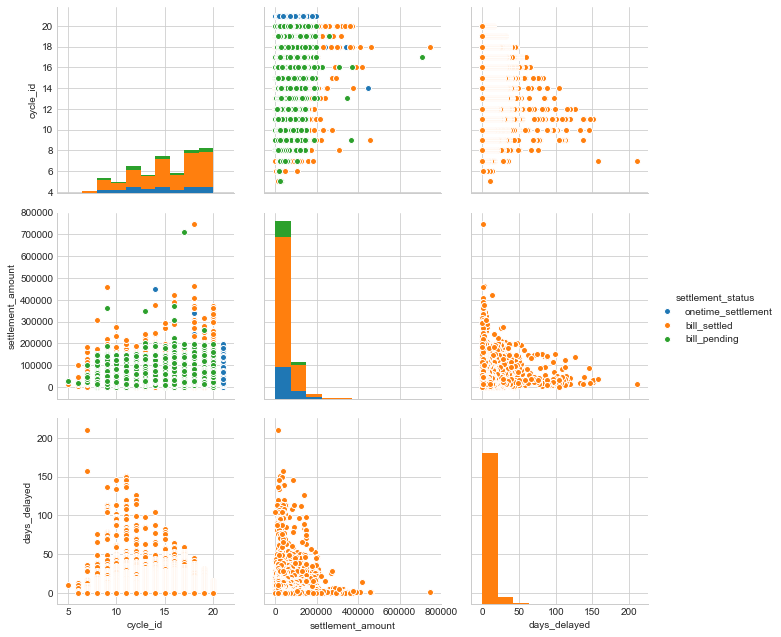

In [6]:
#plotting pair-plots
plt.close();
sns.set_style("whitegrid");
sns.pairplot(Setldt.iloc[:,2:6], hue="settlement_status", size=3);
plt.show()

C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


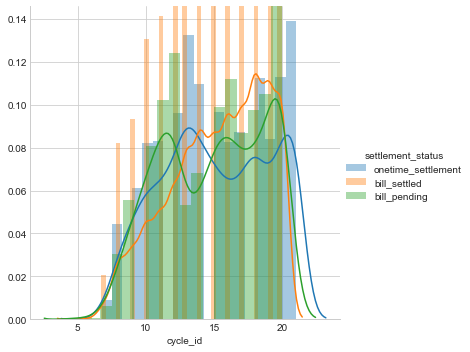

In [7]:
#Drawing PDF
sns.FacetGrid(Setldt, hue="settlement_status", size=5) \
   .map(sns.distplot, "cycle_id") \
   .add_legend();
plt.show();


C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


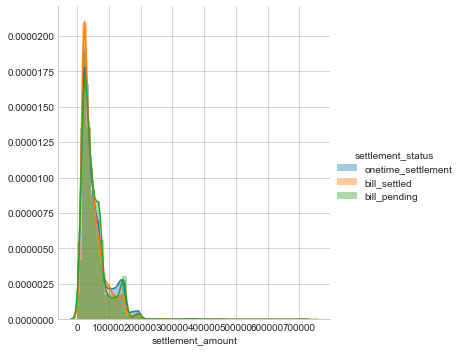

In [8]:
#drawing probablity distribution function(PDF)
sns.FacetGrid(Setldt, hue="settlement_status", size=5) \
   .map(sns.distplot, "settlement_amount") \
   .add_legend();
plt.show();


In [9]:
#statistical operations on selected features
Setldt.iloc[:,3:6].describe()

,settlement_amount,days_delayed
count,30683.000000,22395.000000
mean,50890.082065,5.098359
std,40286.805289,9.669068
min,37.000000,0.000674
25%,23300.000000,0.587529
50%,37600.000000,1.185550
75%,65464.000000,5.789314
max,746000.000000,210.576996


# Observation:
    1) the mean of days_delayed is 5
    2) The median is 1.18 (the mean is varied because of some large numbers) but users tend to pay the amount within 1 day
    

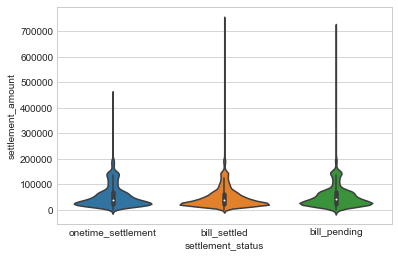

In [10]:
# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot
sns.violinplot(x="settlement_status", y="settlement_amount", data=Setldt, size=8)
plt.show()

In [11]:
#load the APS credit data
Crdt = pd.read_csv("credit_data.csv")


# data-points,features, and columns
print(Crdt.shape)

print(Crdt.columns)



(18468, 3)
Index(['user_id', 'cycle_id', 'global_credit_limit'], dtype='object')


In [12]:
# Merge the credit_data and settlement_data

Setlcr = pd.merge(Setldt,Crdt,how='left', on=['user_id','cycle_id'])

# data-points,features, and columns
print(Setlcr.shape)

print(Setlcr.columns)


(30683, 9)
Index(['id', 'user_id', 'cycle_id', 'settlement_amount', 'settlement_status',
       'days_delayed', 'bill_created_at', 'settled_at', 'global_credit_limit'],
      dtype='object')


In [13]:
print(Setlcr)

          id  user_id  cycle_id  settlement_amount   settlement_status  \
0      31096     1738      21.0             190500  onetime_settlement   
1      29135     6055      20.0             138900        bill_settled   
2      27995    10630      20.0              43100        bill_settled   
3      31095     5766      21.0              75300  onetime_settlement   
4      28720    12416      20.0              38000        bill_settled   
5      28815    13371      20.0              14400        bill_settled   
6      29587    13172      20.0              26400        bill_settled   
7      29529     7199      20.0              11900        bill_settled   
8      27522    12228      20.0              17700        bill_settled   
9      29331    10216      20.0              49700        bill_settled   
10     28456    10585      20.0              30200        bill_settled   
11     31094    13439      21.0              23300  onetime_settlement   
12     31093     2875      21.0       

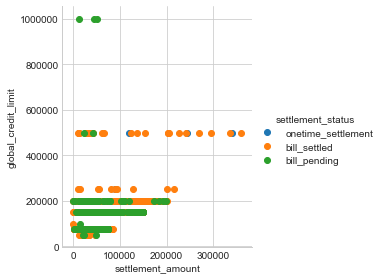

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(Setlcr, hue="settlement_status", size=4) \
   .map(plt.scatter,"settlement_amount", "global_credit_limit") \
   .add_legend();
plt.show()

# observation 
1)the users with good global_credit_limit are tending to keep their bill settled when compared to a user with less global_credit_limit

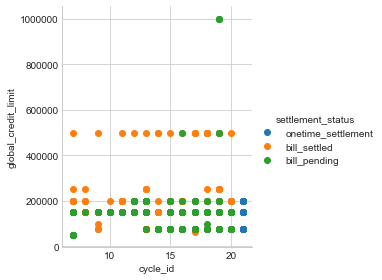

In [15]:
sns.set_style("whitegrid");
sns.FacetGrid(Setlcr, hue="settlement_status", size=4) \
   .map(plt.scatter,"cycle_id", "global_credit_limit") \
   .add_legend();
plt.show()

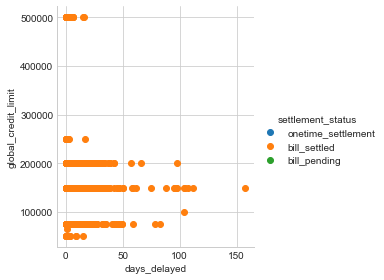

In [16]:
#scatter plot
sns.set_style("whitegrid");
sns.FacetGrid(Setlcr, hue="settlement_status", size=4) \
   .map(plt.scatter,"days_delayed", "global_credit_limit") \
   .add_legend();
plt.show()

# observation:
        1) the days delayed in payment is more for users who have less global_credit_limit

C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


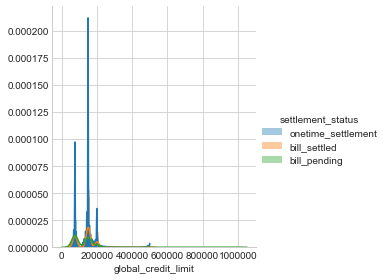

In [17]:
# drawing PDF on global_credit_limit
sns.FacetGrid(Setlcr, hue="settlement_status", size=4) \
   .map(sns.distplot, "global_credit_limit") \
   .add_legend();
plt.show();


In [18]:
#statistical operations on global credit limit
Setlcr.loc[:,'global_credit_limit'].describe()

count       4946.000000
mean      135890.618682
std        55789.855282
min        50000.000000
25%        75000.000000
50%       150000.000000
75%       150000.000000
max      1000000.000000
Name: global_credit_limit, dtype: float64

# observations :
    1)the minimum limit is 50,000
    the maximum limit is 10,00,000
    2)mean and medium are similar (no outlier) 

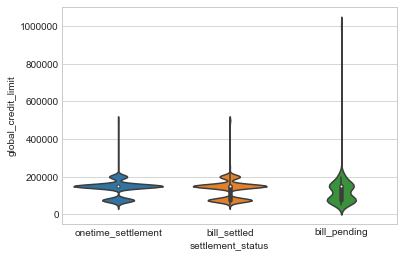

In [19]:
sns.violinplot(x="settlement_status", y="global_credit_limit", data=Setlcr, size=8)
plt.show()

In [20]:
# making a copy of settlement data
Setlcp = Setldt.copy()

In [21]:
#creating a one more column known as even/odd cycle_id to 
#know the behviour of users in different parts of a month
Setlcp['E/O'] = (Setldt.cycle_id)%2

In [22]:
print(Setlcp)

          id  user_id  cycle_id  settlement_amount   settlement_status  \
0      31096     1738      21.0             190500  onetime_settlement   
1      29135     6055      20.0             138900        bill_settled   
2      27995    10630      20.0              43100        bill_settled   
3      31095     5766      21.0              75300  onetime_settlement   
4      28720    12416      20.0              38000        bill_settled   
5      28815    13371      20.0              14400        bill_settled   
6      29587    13172      20.0              26400        bill_settled   
7      29529     7199      20.0              11900        bill_settled   
8      27522    12228      20.0              17700        bill_settled   
9      29331    10216      20.0              49700        bill_settled   
10     28456    10585      20.0              30200        bill_settled   
11     31094    13439      21.0              23300  onetime_settlement   
12     31093     2875      21.0       

C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABHILASH\Miniconda3\envs\appliedai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


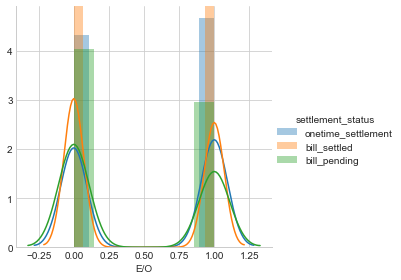

In [23]:
# PDF on E/O feature that is even or odd cycle id
sns.FacetGrid(Setlcp, hue="settlement_status", size=4) \
   .map(sns.distplot, "E/O") \
   .add_legend();
plt.show();


# Observations:
1) we can see that user tend to settle bills more in an even cycle id and the bill pending is also more in an even cycle id when compared to odd cycle id(that will usually be from 15 to 30 of a month given in   cycles.csv data)

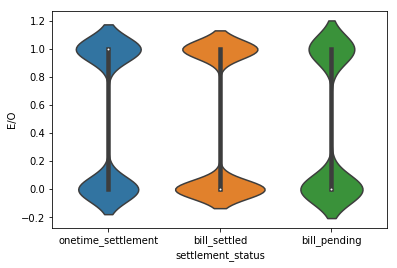

In [7]:
sns.violinplot(x="settlement_status", y="E/O", data=Setlcp, size=8)
plt.show()

In [42]:
# to split the even cycle_id data and odd cycle_id data to perform analytics on them seperately
g=Setlcp.groupby('E/O')
Setlev = g.get_group(0)
Setlod = g.get_group(1)

In [52]:
Setlev['id'].count()


16404

In [54]:
Setlev['days_delayed'].describe()

count    12176.000000
mean         4.436837
std          8.595342
min          0.000674
25%          0.558429
50%          1.059196
75%          4.090327
max        145.672357
Name: days_delayed, dtype: float64

In [58]:
Setlod['id'].count()

14277

In [56]:
Setlod['days_delayed'].describe()

count    10219.000000
mean         5.886566
std         10.757517
min          0.000691
25%          0.625650
50%          1.574168
75%          7.049439
max        210.576996
Name: days_delayed, dtype: float64

# Observation
1) even cycle_id has more number of bill's generated when compared with odd cycle_id 
2) but the average days_delayed by the users in even cycle id is less than the average days delayed by users in odd cycle id

# Summary
Objective: To identify the features which are to considered to understand user repayment Behaviour

Data sets:
1. credit_data
2. cycles
3. transactions_data
4. users_data
5. settlements_data
6. failure_events_data


During my analysis through the datasets, I found that the features available in the settlements_data are more relatable to repayment behavior. As the first observation was obtained by drawing a scatter plot and statistical method  between settlement_amount, days_delayed and cycle_id we found that

1) bill was settled or paid if the settlement amount was high and we can see that some bills were paid if the settlement was less
2) and the one-time settlements can only be seen in the later cycle_ids (which I think means that users are using the APS more and it is gaining the trust of users)
3) on an average user delay for a day or two to settle their bill

after analysis on the features of settlements_data, we looked upon the effect of global_credit_limit on their repayment behavior so, we merged the settlement_data and credits_data and found that

1) the user's with less global_credit value tend to delay a number of days to settle the bill.
2) the mean and median of the global_credit_limit are similar which says that there is not extreme outlier value global_credit_limit

after analysis on the global_credit_limit feature, we were curious about how users behave in different billing cycles of a month 

so we classified the cycle_id into even or odd cycles_id
an odd cycle which is usually first 15 days(1-15) of a month(can be inferred from a cycles data) and even cycle which is usually last 15 days of a month(15-30) and found that
1) the even cycle id has more bills settled and bills pending when compared to odd cycle id that means more bills are generated in the even cycle id

On further analysis on odd and even cycle_id by splitting those data into separate chunks we found that
1) even though the even cycle_id had the big number of the bill's generated but the average days_delayed by the users in even cycle id is less than the average days delayed by users in odd cycle id
that says that users use ASP more in the last 15 days of the month and tend to settle bills little early when compared bills created in first 15 days(i.e odd cycle_id) of the month

Conclusion:
the variables we came across which are important for a users repayment behavior were settlement_amount,cycle_id,global_credit_limit, and type of billing cycle_id(even or odd)
